###**ATOC4500 Data Science Lab: Final Project**
###**Do climate models statistically differ in when they predict the Arctic Ocean will become ice-free?**
###Author: Nate Farmer, nafa7654@colorado.edu###
###last updated: April 30, 2022###

**>>>> This code is available on github at https://github.com/natefarmer/ATOC4500_DataScienceLab_Farmer_FinalProject**

**>>>> NOTE: Please run this and other notebooks using a Chrome browser**

############################

###**Changes from previous version**



*   Added citations. 
*   Added titles and axis labels in the first set of histograms for more clarity.
*   Updated histograms comparing 2 of the models: added the mean and changed the color of confidence intervels to red and also added legends. This was done to better visually communicate the mean and confidence intervals calculated using the data science methods between 2 of the models.
*   Reworded langauge in summary: changed "So, my original hypothesis was correct" to "Therefore, the data analysis resutlts are consistent with the null hypothesis." to use language more commonly used by statisticians and data scientists. 

############################





###**Introduction:** I have been working on the predictability of when the Arctic goes ice-free this school year. An ice-free Arctic is defined as when the average sea ice area is less than 1 million square kilometers. I have alread 'munged' the data I have been working with finding when each of the ensemble members in the CESM1, MPI ESM1, and GFDL ESM2M ensemble members cross that threshold after doing a 5-year running mean. With this project, I wanted to do some statistical analysis of what I have done so far since I have yet to really do any yet. I want to use z-testing to test whether or not the distributions of the model's ensemble members are statistically different compared to the other two modles. I hypothesize that they are all significantly different from each other.


###**Citations:**

Kay, J. E. et al. (2015). The community earth system model (CESM) large ensemble project: a community resource for studying climate change in the presence of internal climate variability. *Bull. Am. Meteorol. Soc.* 96, 1333-1349.

Maher, N. et al. (2019). The Max Planck Institute Grand Ensemble - enabling the exploration of climate system variability. *J. Adv. Model. Earth Syst.* 11, 2050-2069.

Rodgers, K. B., et al. (2015). Emergence of multiple ocean ecosystem drivers ina  large ensemble suite with an Earth system model. *Biogeosciences* 12, 3301-3320.

Deser, C., et al. (2020), Insights from Earth system model initial-condition large ensembles and future prospects, *Nature Climate Change*, 10, 277-286. https://doi.org/10.1038/s41558-020-0731-2

In [ ]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import relativedelta
import csv
from scipy import stats
from matplotlib import rcParams
from sklearn import linear_model
from sklearn import metrics
from google.colab import files

###**Step 1: Read in data**



include description of your data here

In [ ]:
## add code cells here to read in your data
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))#

Saving ice_free_years.csv to ice_free_years.csv
User uploaded file "ice_free_years.csv" with length 12015 bytes


In [ ]:
#reading in the data
data = pd.read_csv("ice_free_years.csv")
data

,Unnamed: 0,model,month,member,ice-free year
0,0,CESM1,8.0,37,2042
1,1,CESM1,8.0,3,2045
2,2,CESM1,8.0,18,2046
3,3,CESM1,8.0,32,2046
4,4,CESM1,8.0,36,2046
...,...,...,...,...,...
505,25,GFDL ESM2M,10.0,29,0
506,26,GFDL ESM2M,10.0,30,0
507,27,GFDL ESM2M,10.0,23,2092
508,28,GFDL ESM2M,10.0,1,2097


###**Step 2: Munge data**

include description of all data processing steps here

In [ ]:
#creating model variables 

#varibles for August for each model
cesm1_aug = data[data.month==8][data.model=='CESM1']['ice-free year']
mpi_esm1_aug = data[data.month==8][data.model=='MPI ESM1']['ice-free year']
gfdl_esm2m_aug = data[data.month==8][data.model=='GFDL ESM2M']['ice-free year']
print()

#varibles for September for each model
cesm1_sept = data[data.month==9][data.model=='CESM1']['ice-free year']
mpi_esm1_sept = data[data.month==9][data.model=='MPI ESM1']['ice-free year']
gfdl_esm2m_sept = data[data.month==9][data.model=='GFDL ESM2M']['ice-free year']
print()

#varibles for October for each model
cesm1_oct = data[data.month==10][data.model=='CESM1']['ice-free year']
mpi_esm1_oct = data[data.month==10][data.model=='MPI ESM1']['ice-free year']
gfdl_esm2m_oct = data[data.month==10][data.model=='GFDL ESM2M']['ice-free year']

#model ensemble sizes

cesm1_size = 40
mpi_esm1_size = 100
gfdl_esm2m_size = 30

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

In [ ]:
## add code cells here to process your data to prepare it for the data science method, i.e. "munge" it

# creating variables for each model for AUGUST and finding the mean and standard deviation
cesm_aug_mean = np.round(cesm1_aug.mean())
print("The CESM1 August mean ice-free year is ", cesm_aug_mean)
cesm_aug_std = np.round(cesm1_aug.std())
print("The CESM1 August standard deviation is ", cesm_aug_std)

mpi_aug_mean = np.round(mpi_esm1_aug.mean())
print("The MPI ESM1 August mean ice-free year is ", mpi_aug_mean)
mpi_aug_std = np.round(mpi_esm1_aug.std())
print("The MPI ESM1 August standard deviation is ", mpi_aug_std)

gfdl_aug_mean = np.round(gfdl_esm2m_aug.mean())
print("The GFDL ESM2M August mean ice-free year is ", gfdl_aug_mean)
gfdl_aug_std = np.round(gfdl_esm2m_aug.std())
print("The GFDL ESM2M August standard deviation is ", gfdl_aug_std)

# creating variables for each model for SEPTEMBER and finding the mean and standard deviation
print()
cesm_sept_mean = np.round(cesm1_sept.mean())
print("The CESM1 September mean ice-free year is ", cesm_sept_mean)
cesm_sept_std = np.round(cesm1_sept.std())
print("The CESM1 September standard deviation is ", cesm_sept_std)

mpi_sept_mean = np.round(mpi_esm1_sept.mean())
print("The MPI ESM1 September mean ice-free year is ", mpi_sept_mean)
mpi_sept_std = np.round(mpi_esm1_aug.std())
print("The MPI ESM1 September standard deviation is ", mpi_sept_std)

gfdl_sept_mean = np.round(gfdl_esm2m_sept.mean())
print("The GFDL ESM2M September mean ice-free year is ", gfdl_sept_mean)
gfdl_sept_std = np.round(gfdl_esm2m_sept.std())
print("The GFDL ESM2M September standard deviation is ", gfdl_sept_std)

# creating variables for each model for October and finding the mean and standard deviation
print()
cesm_oct_mean = np.round(cesm1_oct.mean())
print("The CESM1 October mean ice-free year is ", cesm_oct_mean)
cesm_oct_std = np.round(cesm1_oct.std())
print("The CESM1 October standard deviation is ", cesm_oct_std)

mpi_oct_mean = np.round(mpi_esm1_oct.mean())
print("The MPI ESM1 October mean ice-free year is ", mpi_oct_mean)
mpi_oct_std = np.round(mpi_esm1_oct.std())
print("The MPI ESM1 October standard deviation is ", mpi_oct_std)

print()
#GFDL ESM2M HAS ONLY 3 MEMBERS THAT GO ICE-FREE IN OCTOBER SO DECIDED NOT TO LOOK AT IT

The CESM1 August mean ice-free year is  2050.0
The CESM1 August standard deviation is  3.0
The MPI ESM1 August mean ice-free year is  2055.0
The MPI ESM1 August standard deviation is  4.0
The GFDL ESM2M August mean ice-free year is  2082.0
The GFDL ESM2M August standard deviation is  5.0

The CESM1 September mean ice-free year is  2044.0
The CESM1 September standard deviation is  3.0
The MPI ESM1 September mean ice-free year is  2048.0
The MPI ESM1 September standard deviation is  4.0
The GFDL ESM2M September mean ice-free year is  2069.0
The GFDL ESM2M September standard deviation is  5.0

The CESM1 October mean ice-free year is  2057.0
The CESM1 October standard deviation is  3.0
The MPI ESM1 October mean ice-free year is  2062.0
The MPI ESM1 October standard deviation is  3.0



###**Step 3: Apply Data Science Method(s)**

include description of step 3 here, include assumptions

In [ ]:
## add code cells here to apply your data science method

State the sigificance level: 0.05, 95% confidence interval

State the null hypothesis (H0): CESM1 and GFDL ESM2M are statistically different

State the statistic to be used, and the assumptions: This is using the Z-test statistic.

State the critical region:

Evaluate the statistic and state the conclusion (provide code below)

In [ ]:
#creating the z-statistic function

def zstat(sample_mean,sample_std,N):
  ## Note: Python calculates left/lower-tail probabilities by default, 
  ## so for the 95% confidence interval, use 0.975
  zstat95=stats.norm.ppf(0.975)
  low_limit95=sample_mean-zstat95*(sample_std/np.sqrt(N))
  high_limit95=sample_mean+zstat95*(sample_std/np.sqrt(N))

  ## so for the 99% confidence interval, use 0.995
  # zstat99=stats.norm.ppf(0.995)
  # low_limit99=sample_mean-zstat99*(sample_std/np.sqrt(N))
  # high_limit99=sample_mean+zstat99*(sample_std/np.sqrt(N))

  print('CONFIDENCE INTERVALS USING Z-STATISTIC')
  print(f'The sample mean is {np.round(sample_mean,2)}')
  print(f'N={N}')
  print(f'The 95% confidence interval on the true mean is \
  {np.round(low_limit95,2)} and {np.round(high_limit95,2)}')
  # print(f'The 99% confidence interval on the true mean is \
  # {np.round(low_limit99,2)} and {np.round(high_limit99,2)}')  

In [ ]:
#calling the function on CESM1 and GFDL ESM2M for August

zstat(cesm_aug_mean,cesm_aug_std, cesm1_size)
print("")
zstat(gfdl_aug_mean,gfdl_aug_std, gfdl_esm2m_size)

CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 2050.0
N=40
The 95% confidence interval on the true mean is   2049.07 and 2050.93

CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 2082.0
N=30
The 95% confidence interval on the true mean is   2080.21 and 2083.79


In [ ]:
#calling the function on CESM1 and MPI ESM1 for August

zstat(cesm_aug_mean,cesm_aug_std, cesm1_size)
print("")
zstat(mpi_aug_mean,mpi_aug_std, mpi_esm1_size)

CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 2050.0
N=40
The 95% confidence interval on the true mean is   2049.07 and 2050.93

CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 2055.0
N=100
The 95% confidence interval on the true mean is   2054.22 and 2055.78


In [ ]:
#calling the function on MPI ESM1 and GFDL ESM2M for August

zstat(mpi_aug_mean,mpi_aug_std, mpi_esm1_size)
print("")
zstat(gfdl_aug_mean,gfdl_aug_std, gfdl_esm2m_size)

CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 2055.0
N=100
The 95% confidence interval on the true mean is   2054.22 and 2055.78

CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 2082.0
N=30
The 95% confidence interval on the true mean is   2080.21 and 2083.79


In [ ]:
#calling the function on CESM1 and GFDL ESM2M for September

zstat(cesm_sept_mean,cesm_sept_std, cesm1_size)
print("")
zstat(gfdl_sept_mean,gfdl_sept_std, gfdl_esm2m_size)

CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 2044.0
N=40
The 95% confidence interval on the true mean is   2043.07 and 2044.93

CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 2069.0
N=30
The 95% confidence interval on the true mean is   2067.21 and 2070.79


In [ ]:
#calling the function on CESM1 and MPI ESM1 for September

zstat(cesm_sept_mean,cesm_sept_std, cesm1_size)
print("")
zstat(mpi_sept_mean,mpi_sept_std, mpi_esm1_size)

CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 2044.0
N=40
The 95% confidence interval on the true mean is   2043.07 and 2044.93

CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 2048.0
N=100
The 95% confidence interval on the true mean is   2047.22 and 2048.78


In [ ]:
#calling the function on MPI ESM1 and GFDL ESM2M for September

zstat(mpi_sept_mean,mpi_sept_std, mpi_esm1_size)
print("")
zstat(gfdl_sept_mean,gfdl_sept_std, gfdl_esm2m_size)

CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 2048.0
N=100
The 95% confidence interval on the true mean is   2047.22 and 2048.78

CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 2069.0
N=30
The 95% confidence interval on the true mean is   2067.21 and 2070.79


In [ ]:
#calling the function on CESM1 and MPI ESM1 for October

zstat(cesm_oct_mean,cesm_oct_std, cesm1_size)
print("")
zstat(mpi_oct_mean,mpi_oct_std, mpi_esm1_size)

CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 2057.0
N=40
The 95% confidence interval on the true mean is   2056.07 and 2057.93

CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 2062.0
N=100
The 95% confidence interval on the true mean is   2061.41 and 2062.59


###**Step 4: Present results visually using 2-3 graphs**

In [ ]:
## add code cells here to plot the results here

# define bins for the histogram
delta= 1                               ## bin size
minbin=2030                          ## minimum bin value
maxbin=2101                            ## maximum bin value
hist_bins = np.arange(minbin,maxbin,delta) ## bins
print(hist_bins)

[2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043
 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057
 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071
 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083 2084 2085
 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099
 2100]


In [ ]:
#defining function to plot histograms
def plot_data_hist(d,hist_bins):
  h, mids = np.histogram(d,bins=hist_bins)
  plt.figure(figsize=(10,5))
  plt.hist(d,bins=mids,facecolor='w',edgecolor="k") 
  #plt.plot(mids[0:-1]+(delta/2),h)
  font = {'family': 'Sans','color': 'black', 'weight': 'normal', 'size': 12,}
  #plt.title('Histogram of '+f"{np.int(min(d[0][:]))}"+'-'+f"{np.int(max(d[0][:]))}"+' Global Mean Surface Temperature Anomaly', 
            #fontdict = font) 
  #plt.xlabel('anomaly, $^\circ$C', fontdict = font) 
  #plt.ylabel("Number of instances", fontdict = font)

Text(0, 0.5, 'Frequency')

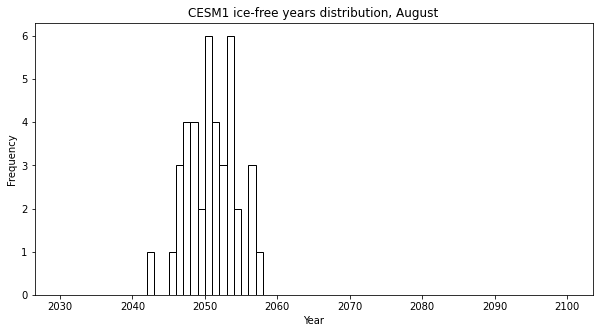

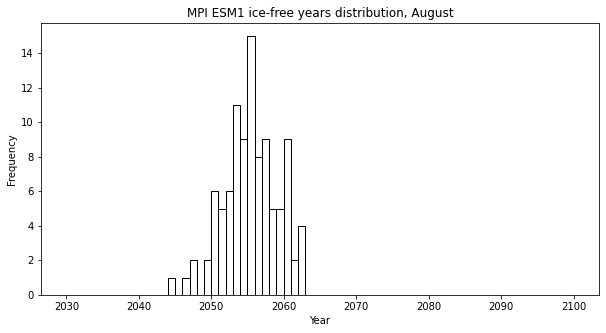

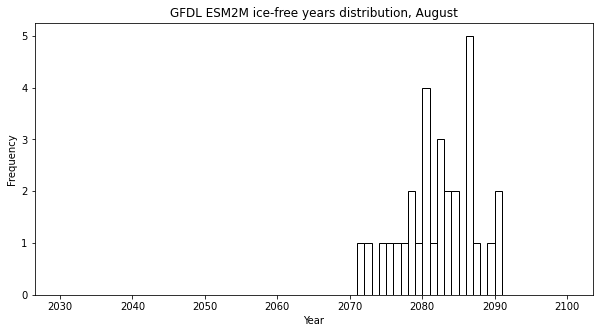

In [ ]:
#These plots are just used as a visual to see what each model's August ice-free year distribution looks like

plot_data_hist(cesm1_aug,hist_bins)
plt.title('CESM1 ice-free years distribution, August')
plt.xlabel('Year')
plt.ylabel('Frequency')

plot_data_hist(mpi_esm1_aug,hist_bins)
plt.title('MPI ESM1 ice-free years distribution, August')
plt.xlabel('Year')
plt.ylabel('Frequency')

plot_data_hist(gfdl_esm2m_aug,hist_bins)
plt.title('GFDL ESM2M ice-free years distribution, August')
plt.xlabel('Year')
plt.ylabel('Frequency')

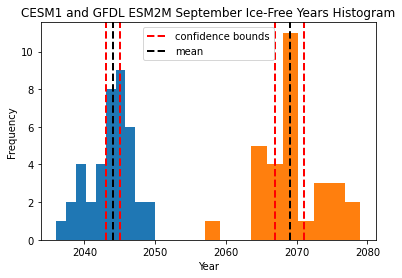

In [ ]:
plt.hist(cesm1_sept,stacked=True);
plt.hist(gfdl_esm2m_sept,stacked=True);
plt.axvline(2043, color='r', linestyle='dashed', linewidth=2, label='confidence bounds');
plt.axvline(2044, color='k', linestyle='dashed', linewidth=2, label='mean');
plt.axvline(2045, color='r', linestyle='dashed', linewidth=2);
plt.axvline(2067, color='r', linestyle='dashed', linewidth=2);
plt.axvline(2069, color='k', linestyle='dashed', linewidth=2);
plt.axvline(2071, color='r', linestyle='dashed', linewidth=2);
plt.title("CESM1 and GFDL ESM2M September Ice-Free Years Histogram");
plt.ylabel("Frequency");
plt.xlabel("Year");
plt.legend(loc='upper center')

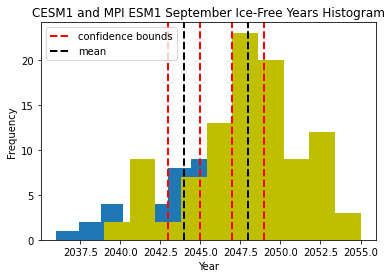

In [ ]:
plt.hist(cesm1_sept,stacked=True);
plt.hist(mpi_esm1_sept,stacked=True, color='y');
plt.axvline(2043, color='r', linestyle='dashed', linewidth=2, label='confidence bounds');
plt.axvline(2044, color='k', linestyle='dashed', linewidth=2, label='mean');
plt.axvline(2045, color='r', linestyle='dashed', linewidth=2);
plt.axvline(2047, color='r', linestyle='dashed', linewidth=2);
plt.axvline(2048, color='k', linestyle='dashed', linewidth=2);
plt.axvline(2049, color='r', linestyle='dashed', linewidth=2);
plt.title("CESM1 and MPI ESM1 September Ice-Free Years Histogram");
plt.ylabel("Frequency");
plt.xlabel("Year");
plt.legend(loc='upper left')

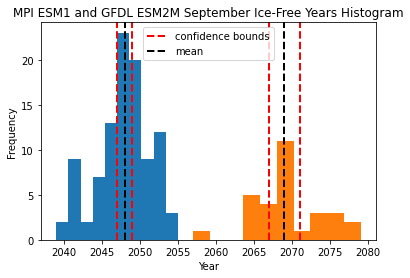

In [ ]:
plt.hist(mpi_esm1_sept,stacked=True);
plt.hist(gfdl_esm2m_sept,stacked=True);
plt.axvline(2047, color='r', linestyle='dashed', linewidth=2, label='confidence bounds');
plt.axvline(2048, color='k', linestyle='dashed', linewidth=2, label='mean');
plt.axvline(2049, color='r', linestyle='dashed', linewidth=2);
plt.axvline(2067, color='r', linestyle='dashed', linewidth=2);
plt.axvline(2069, color='k', linestyle='dashed', linewidth=2);
plt.axvline(2071, color='r', linestyle='dashed', linewidth=2);
plt.title("MPI ESM1 and GFDL ESM2M September Ice-Free Years Histogram");
plt.ylabel("Frequency");
plt.xlabel("Year");
plt.legend(loc='upper center')

###**Summary**: Write your text here. Discuss what you found including how it relates to your hypothesis and underlying motivation.

I found that each model during August, September, and October are infact statistically significant. Therefore, the data analysis resutlts are consistent with the null hypothesis. However, the CESM1 and MPI ESM1 models closer to not being statistically significant that I would have thought. Their means and 95% confidence intervals were close to one another, but never overlapped.